First, import Matplotlib for visualization and NumPy for array operations. You’ll also need LogisticRegression, classification_report(), and confusion_matrix() from scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

In [ ]:
x = np.arange(10).reshape(-1, 1)
x

The array x is required to be two-dimensional. 

It should have one column for each input, and the number of rows should be equal to the number of observations. 

To make x two-dimensional, you apply .reshape() with the arguments -1 to get as many rows as needed and 1 to get one column. 

x has two dimensions:

- One column for a single input
- Ten rows, each corresponding to one observation

In [ ]:
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
y

y is one-dimensional with ten items. Again, each item corresponds to one observation. It contains only zeros and ones since this is a binary classification problem.

The input and output should be NumPy arrays or similar objects. numpy.arange() creates an array of consecutive, equally-spaced values within a given range. 

In [ ]:
# Once you have the input and output prepared, you can create and 
# define your classification model.
model = LogisticRegression(solver='liblinear', random_state=0)

The solver (remerber LLF??) is a string ('liblinear' by default) that decides what solver to use for fitting the model. 

Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

It might be an __hyperparameter__ to tune.

In [ ]:
model.fit(x, y)

Once the model is created, you need to fit (or train) it. Model fitting is the process of determining the coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ that correspond to the best value of the cost function. sklearn fit the model with .fit()

In [ ]:
#the following code is equivalent
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [ ]:
model.classes_

We can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓

In [ ]:
model.intercept_

In [ ]:
model.coef_

Once a model is defined, you can check its performance with `.predict_proba()`, which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [ ]:
model.predict_proba(x)

In the matrix above, each row corresponds to a single sample. 

The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 

The second column is the probability that the output is one, or 𝑝(𝑥).


You can get the __actual predictions__, based on the probability matrix and the values of 𝑝(𝑥), with `.predict()`:

In [ ]:
model.predict(x)

In [ ]:
y

When we have nine out of ten observations classified correctly, the accuracy of our model is equal to 9/10=0.9, which you can obtain with `.score()`:

In [ ]:
model.score(x, y)

In [ ]:
# confusion matrix
confusion_matrix(y, model.predict(x))

The obtained matrix shows the following:

 - Three true negative predictions: The first three observations are zeros predicted correctly.
 - No false negative predictions: These are the ones wrongly predicted as zeros.
 - One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
 - Six true positive predictions: The last six observations are ones predicted correctly.

In [ ]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

We can get a more comprehensive report on the classification with `classification_report()`:

In [ ]:
print(classification_report(y, model.predict(x)))

We can improve your model by setting different hyperparameters. 

For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0.

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
model.predict_proba(x)

In [ ]:
model.predict(x)

In [ ]:
y

In [ ]:
model.score(x, y)

In [ ]:
confusion_matrix(y, model.predict(x))

In [ ]:
print(classification_report(y, model.predict(x)))

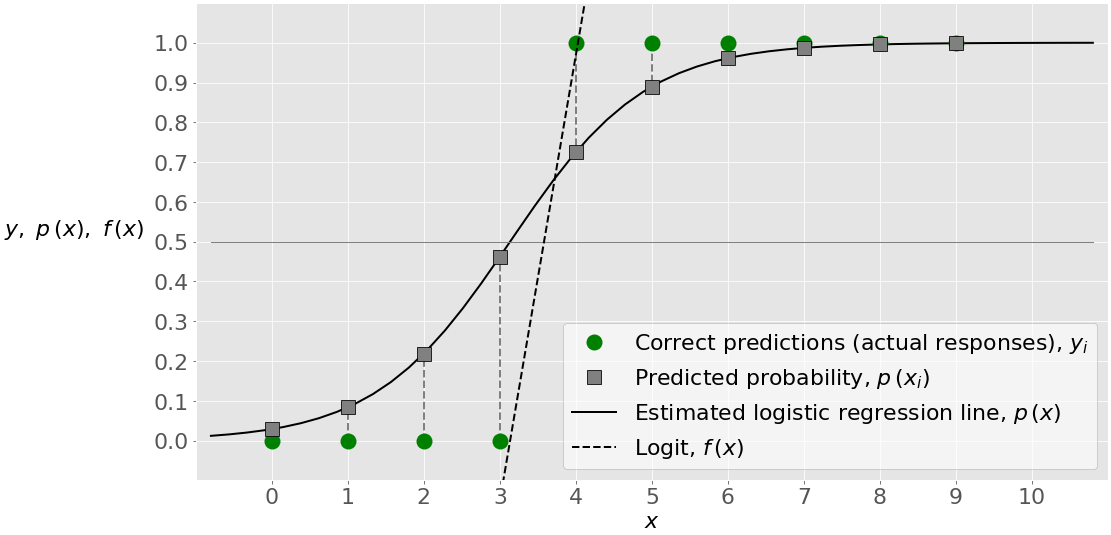

Let’s solve another classification problem. It’s similar to the previous one, except that the output differs in the second value. 

In [ ]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

In [ ]:
# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, model.predict(x))

In [ ]:
print('x:', x, sep='\n')

In [ ]:
print('y:', y)

In [ ]:
print('intercept:', model.intercept_)

In [ ]:
print('coef:', model.coef_)

In [ ]:
print('p_pred:', p_pred, sep='\n')

In [ ]:
print('y_pred:', y_pred)

In [ ]:
print('score_:', score_)

In [ ]:
conf_m

In [ ]:
print('report:', report, sep='\n')

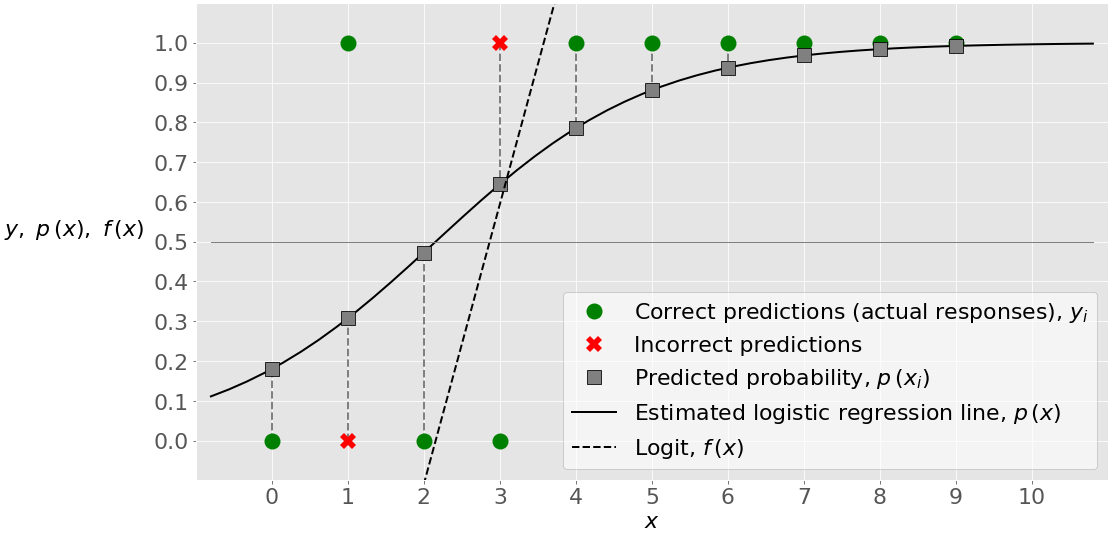

This figure reveals one important characteristic of this example. Unlike the previous one, this __problem is not linearly separable__. 

That means you can’t find a value of 𝑥 and draw a straight line to separate the observations with 𝑦=0 and those with 𝑦=1. 

Keep in mind that __logistic regression is essentially a linear classifier__, so you theoretically can’t make a logistic regression model with an accuracy of 1 in this case.

### Another example

In [ ]:
import pandas as pd
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

In [ ]:
#view first six rows of dataset
data[0:6]

 - default: Indicates whether or not an individual defaulted.
 - student: Indicates whether or not an individual is a student.
 - balance: Average balance carried by an individual.
 - income: Income of the individual.

Suppose we would like to build a logistic regression model that uses “balance” to predict the probability that a given individual defaults.

In [ ]:
#define the predictor variable and the response variable
x = data['balance'].to_numpy().reshape(-1, 1)
x

In [ ]:
y = data['default'].to_numpy()
y

We can see that higher values of balance are associated with higher probabilities that an individual defaults.

In [ ]:
#the following code is equivalent
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [ ]:
model.classes_

We can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓

In [ ]:
model.intercept_

In [ ]:
model.coef_

Once a model is defined, you can check its performance with `.predict_proba()`, which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [ ]:
model.predict_proba(x)

In the matrix above, each row corresponds to a single sample. 

The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 

The second column is the probability that the output is one, or 𝑝(𝑥).


You can get the __actual predictions__, based on the probability matrix and the values of 𝑝(𝑥), with `.predict()`:

In [ ]:
model.predict(x)

In [ ]:
y

When we have nine out of ten observations classified correctly, the accuracy of our model is equal to 9/10=0.9, which you can obtain with `.score()`:

In [ ]:
model.score(x, y)

In [ ]:
# confusion matrix
confusion_matrix(y, model.predict(x))

In [ ]:
# import functions for confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # confusion matrix

In [ ]:
confusion_matrix(y, model.predict(x))

In [ ]:
plot_confusion_matrix(model, x, y) 
plt.grid(False)
plt.show()

In [ ]:
plot_confusion_matrix(model, x, y,normalize='true') #try 'all'
plt.grid(False)
plt.show()

We can get a more comprehensive report on the classification with `classification_report()`:

In [ ]:
print(classification_report(y, model.predict(x)))

In [ ]:
import seaborn as sns
#plot logistic regression curve
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

We can see that higher values of balance are associated with higher probabilities that an individual defaults.

In [ ]:
#plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

try with income!

#### We can use statsmodel pqckage, the same we used for linear reglression (OLS)

In [ ]:
import numpy as np
import statsmodels.api as sm

In [ ]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

In [ ]:
x

In [ ]:
y

In [ ]:
model = sm.Logit(y, x)

In [ ]:
result = model.fit()

In [ ]:
result.params

In [ ]:
result.predict(x)

In [ ]:
#These probabilities are calculated with .predict(). You can use their values to get the actual predicted outputs:
(result.predict(x) >= 0.5).astype(int)

In [ ]:
result.pred_table()

In [ ]:
result.summary()

In [ ]:
result.summary2()

### Handwriting Recognition - a multivariate example

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

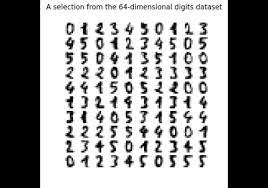

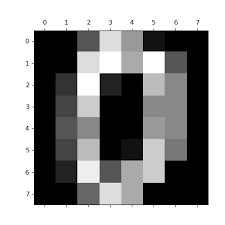

In [ ]:
x, y = load_digits(return_X_y=True) #import the data

In [ ]:
x

In [ ]:
y

In [ ]:
# Split in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
# apply the model
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

'ovr' says to make the binary fit for each class

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#interpreting the coefficients
print('coef:', model.coef_)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x, y)
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             np.arange(64), 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

### Can you do the same on iris?

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=colnames)

In [ ]:
x = data.drop('Class', axis=1)
x

In [ ]:
y = data['Class']
y

In [ ]:
# Split in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
# apply the model
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

'ovr' says to make the binary fit for each class

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()